# Analysis of heart disease from Cleveland patients database

in ESC: SCD accounts for approximately 50% of all cardiovascular deaths, with up to 50% being the first manifestation of cardiac disease.

American heart association = heart disease = heart and blood vessel disease.

## About the dataset

Source: International application of a new probability algorithm for the diagnosis of coronary artery disease.
By R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. Guppy, S. Lee, V. Froelicher. 1989
Published in American Journal of Cardiology



Clinical and noninvasive test results of 303 patients under-going angiography at the Cleveland Clink in Cleveland, Ohio

| Variable Name | Role      | Type        | Demographic | Description                                                  | Units   | Missing Values |
|---------------|-----------|-------------|-------------|--------------------------------------------------------------|---------|----------------|
| age           | Feature   | Integer     | Age         |                                                              | years   | no             |
| sex           | Feature   | Categorical | Sex         |                                                              |         | no             |
| cp            | Feature   | Categorical |             |                                                              |         | no             |
| trestbps      | Feature   | Integer     |             | resting blood pressure (on admission to the hospital)        | mm Hg   | no             |
| chol          | Feature   | Integer     |             | serum cholestoral                                            | mg/dl   | no             |
| fbs           | Feature   | Categorical |             | fasting blood sugar > 120 mg/dl                              |         | no             |
| restecg       | Feature   | Categorical |             |                                                              |         | no             |
| thalach       | Feature   | Integer     |             | maximum heart rate achieved                                  |         | no             |
| exang         | Feature   | Categorical |             | exercise induced angina                                      |         | no             |
| oldpeak       | Feature   | Integer     |             | ST depression induced by exercise relative to rest            |         | no             |
| slope         | Feature   | Categorical |             |                                                              |         | no             |
| ca            | Feature   | Integer     |             | number of major vessels (0-3) colored by flourosopy          |         | yes            |
| thal          | Feature   | Categorical |             |                                                              |         | yes            |
| num           | Target    | Integer     |             | diagnosis of heart disease                                   |         | no             |


age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type. 1: typical angina,  2: atypical angina, 3: non-anginal pain, 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

restecg: resting electrocardiographic results. 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment. 1: upsloping,  2: flat, 3: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (thallium stress test results)
Dipyridamole-Thallium scan results may show:

-Normal perfusion study – normal blood supply to all areas of the heart muscle

-Reversible perfusion defect – decreased blood flow to an area of heart muscle, due to inadequate blood supply from a particular coronary artery (blood vessel around the heart)

-Fixed perfusion defect – decreased blood flow to an area of heart muscle, due to permanently damaged muscle (essentially a scar in the heart muscle)



num: diagnosis of heart disease (angiographic disease status). 0: < 50% diameter narrowing, 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)



## Import libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
%load_ext autoreload
%autoreload 2

## Import the Data

In [2]:
pwd

'/Users/pauline/local_code/heart_disease/heart_disease'

In [1]:
from src.load import load_data, describe_data

In [2]:
df=load_data('data/processed.cleveland.data')

In [3]:
describe_data(df)

The number of (rows,columns) in this dataset is (303, 14).
 
Information about columns names and types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    float64
 1   sex                   303 non-null    float64
 2   chest_pain            303 non-null    float64
 3   rest_blood_pressure   303 non-null    float64
 4   serum_cholesterol     303 non-null    float64
 5   fasting_blood_sugar   303 non-null    float64
 6   rest_ecg              303 non-null    float64
 7   max_heart_rate_thal   303 non-null    float64
 8   exercise_angina       303 non-null    float64
 9   st_oldpeak            303 non-null    float64
 10  st_slope              303 non-null    float64
 11  nb_major_vessels      299 non-null    float64
 12  thallium_stress_test  301 non-null    float64
 13  diagnosis             

In [5]:
# Display the first few rows of the dataset
df.head()

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Comment: Each row represents a patient. There are 14 attributes.

In [6]:
# display 5 random rows
df.sample(5)

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,diagnosis
50,41.0,0.0,2.0,105.0,198.0,0.0,0.0,168.0,0.0,0.0,1.0,1.0,3.0,0
201,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,0
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3
277,39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0,0
23,58.0,1.0,3.0,132.0,224.0,0.0,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3


## Understanding the data structure

In [7]:
# Return number of rows and columns
shape_of_data = df.shape
print(f'The number of (rows,columns) in this dataset is {shape_of_data}.')

The number of (rows,columns) in this dataset is (303, 14).


In [8]:
# Return infos about the columns names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    float64
 1   sex                   303 non-null    float64
 2   chest_pain            303 non-null    float64
 3   rest_blood_pressure   303 non-null    float64
 4   serum_cholesterol     303 non-null    float64
 5   fasting_blood_sugar   303 non-null    float64
 6   rest_ecg              303 non-null    float64
 7   max_heart_rate_thal   303 non-null    float64
 8   exercise_angina       303 non-null    float64
 9   st_oldpeak            303 non-null    float64
 10  st_slope              303 non-null    float64
 11  nb_major_vessels      299 non-null    float64
 12  thallium_stress_test  301 non-null    float64
 13  diagnosis             303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Comment: The dataset info shows that it contains numerical values, float or integer. However, we know that some variables are categorical, some are boolean and some are numerical.

Let's change the categories names for the categorical variables to make it more understandable. This will help for readability and understanding the data visualization later because the assignment of a number to the categories is difficult to understand, for example for 'thallium_stress_test', we have 3, 6 and 7 coding for 3 : 'normal', 6 : 'fixed defect', 7 : 'reversable defect'.

Then we will assign the correct type to each variable.

## Organizing the dataset

### Renaming category names for categorical variables and assigning correct type

In [6]:
from src.process import process_categorical_columns, process_boolean_columns

In [7]:
process_categorical_columns(df)

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,diagnosis
0,63.0,male,typical angina,145.0,233.0,1.0,probable or definite LV hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,0.0,probable or definite LV hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,67.0,male,asymptomatic,120.0,229.0,0.0,probable or definite LV hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,37.0,male,non-anginal pain,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,41.0,female,atypical angina,130.0,204.0,0.0,probable or definite LV hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,typical angina,110.0,264.0,0.0,normal,132.0,0.0,1.2,flat,0.0,reversable defect,1
299,68.0,male,asymptomatic,144.0,193.0,1.0,normal,141.0,0.0,3.4,flat,2.0,reversable defect,2
300,57.0,male,asymptomatic,130.0,131.0,0.0,normal,115.0,1.0,1.2,flat,1.0,reversable defect,3
301,57.0,female,atypical angina,130.0,236.0,0.0,probable or definite LV hypertrophy,174.0,0.0,0.0,flat,1.0,normal,1


Comment: Now that we changed the categorical names for the categorical variables. For readibility and understanding purposes, for the variable 'sex' that should be booleans I will replace 0 and 1 by what they represent (0: female, 1:male).

For the variables 'fasting_blood_sugar', 'exercise_angina', 'diagnosis', we will change them into boolean True or False and rename the column names.

### Changing variables to boolean type

For the diagnosis, we have 0 which means absence of heart disease and 1,2,3 and 4 representing presence of heart disease. To simplify, we will changethe values from 1 to 4 to 1.

In [8]:
process_boolean_columns(df)

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,high_fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,heart_disease_diagnosis
0,63.0,male,typical angina,145.0,233.0,True,probable or definite LV hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,False
1,67.0,male,asymptomatic,160.0,286.0,False,probable or definite LV hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,male,asymptomatic,120.0,229.0,False,probable or definite LV hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,True
3,37.0,male,non-anginal pain,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,False
4,41.0,female,atypical angina,130.0,204.0,False,probable or definite LV hypertrophy,172.0,False,1.4,upsloping,0.0,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,typical angina,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversable defect,True
299,68.0,male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,True
300,57.0,male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,True
301,57.0,female,atypical angina,130.0,236.0,False,probable or definite LV hypertrophy,174.0,False,0.0,flat,1.0,normal,True


Comment: Now variables 'fast_blood_sugar', 'exercise_angina' and 'diagnosis' are boolean. Let's rename some columns to make it understandable. I will change 'fasting_blood_sugar' to 'high_fasting_blood_sugar', because this is true when the value is > 120 mg/dl and let's change 'diagnosis' to 'heart_disease_diagnosis'

In [24]:
# Finally let's check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       303 non-null    float64 
 1   sex                       303 non-null    object  
 2   chest_pain                303 non-null    category
 3   rest_blood_pressure       303 non-null    float64 
 4   serum_cholesterol         303 non-null    float64 
 5   high_fasting_blood_sugar  303 non-null    bool    
 6   rest_ecg                  303 non-null    category
 7   max_heart_rate_thal       303 non-null    float64 
 8   exercise_angina           303 non-null    bool    
 9   st_oldpeak                303 non-null    float64 
 10  st_slope                  303 non-null    category
 11  nb_major_vessels          299 non-null    float64 
 12  thallium_stress_test      301 non-null    category
 13  heart_disease_diagnosis   303 non-null    bool    

### Quick statistics summary of the numerical variables

In [25]:
# Look at the summary statistics of the dataset for numerical values
df.describe()

,age,rest_blood_pressure,serum_cholesterol,max_heart_rate_thal,st_oldpeak,nb_major_vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


Comment: From the summary, the categorical and boolean variables are not shown because it is not meaningful to show the mean.

We can already see some missing values in 'nb_major_vessels'

## Data exploration and visualization

### Is the dataset balanced between heart disease and healthy group?

### what's the distribution of male/female in the whole dataset?

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


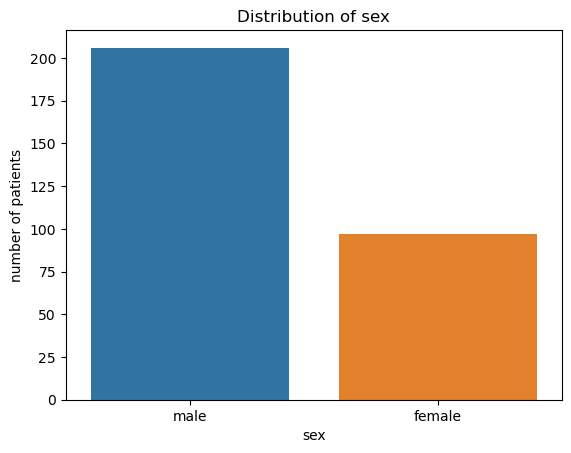

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


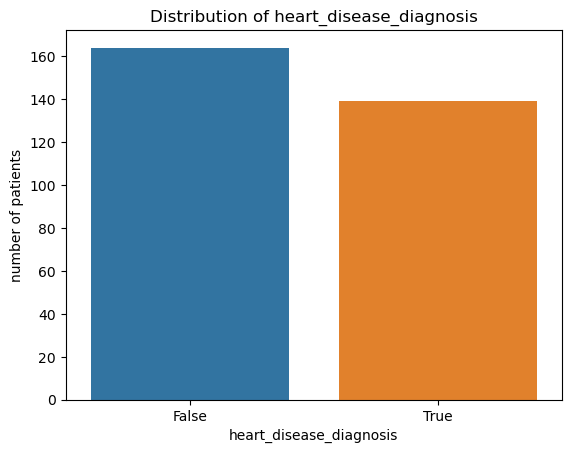

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


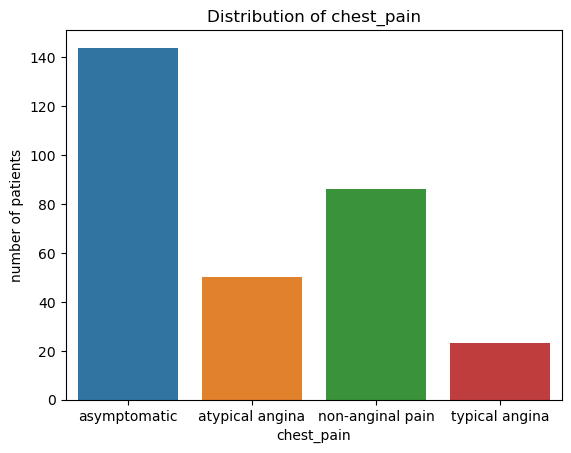

In [14]:
from src.plotting import make_count_plots

make_count_plots(df, ['sex', 'heart_disease_diagnosis', 'chest_pain'])


/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='age'>

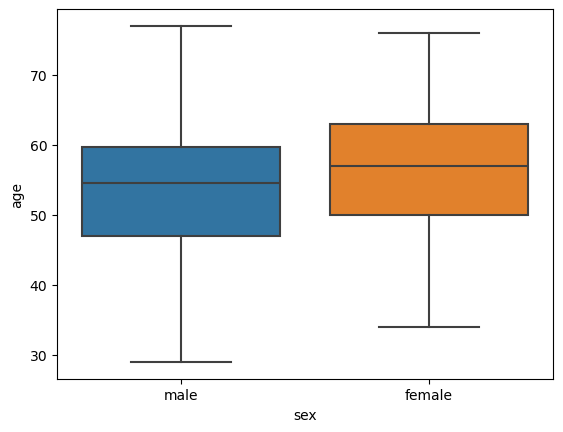

In [61]:
# Mean age between
sns.boxplot(data = df, y = 'age', x = 'sex')

In [28]:
df.columns

Index(['age', 'sex', 'chest_pain', 'rest_blood_pressure', 'serum_cholesterol',
       'high_fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_thal',
       'exercise_angina', 'st_oldpeak', 'st_slope', 'nb_major_vessels',
       'thallium_stress_test', 'heart_disease_diagnosis'],
      dtype='object')

Let's split the dataset between the numerical variables and the categorical ones.

In [11]:
categorical_columns = ['chest_pain', 'st_slope', 'thallium_stress_test', 'rest_ecg']

In [30]:
boolean_columns = ['sex', 'high_fasting_blood_sugar', 'exercise_angina']

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

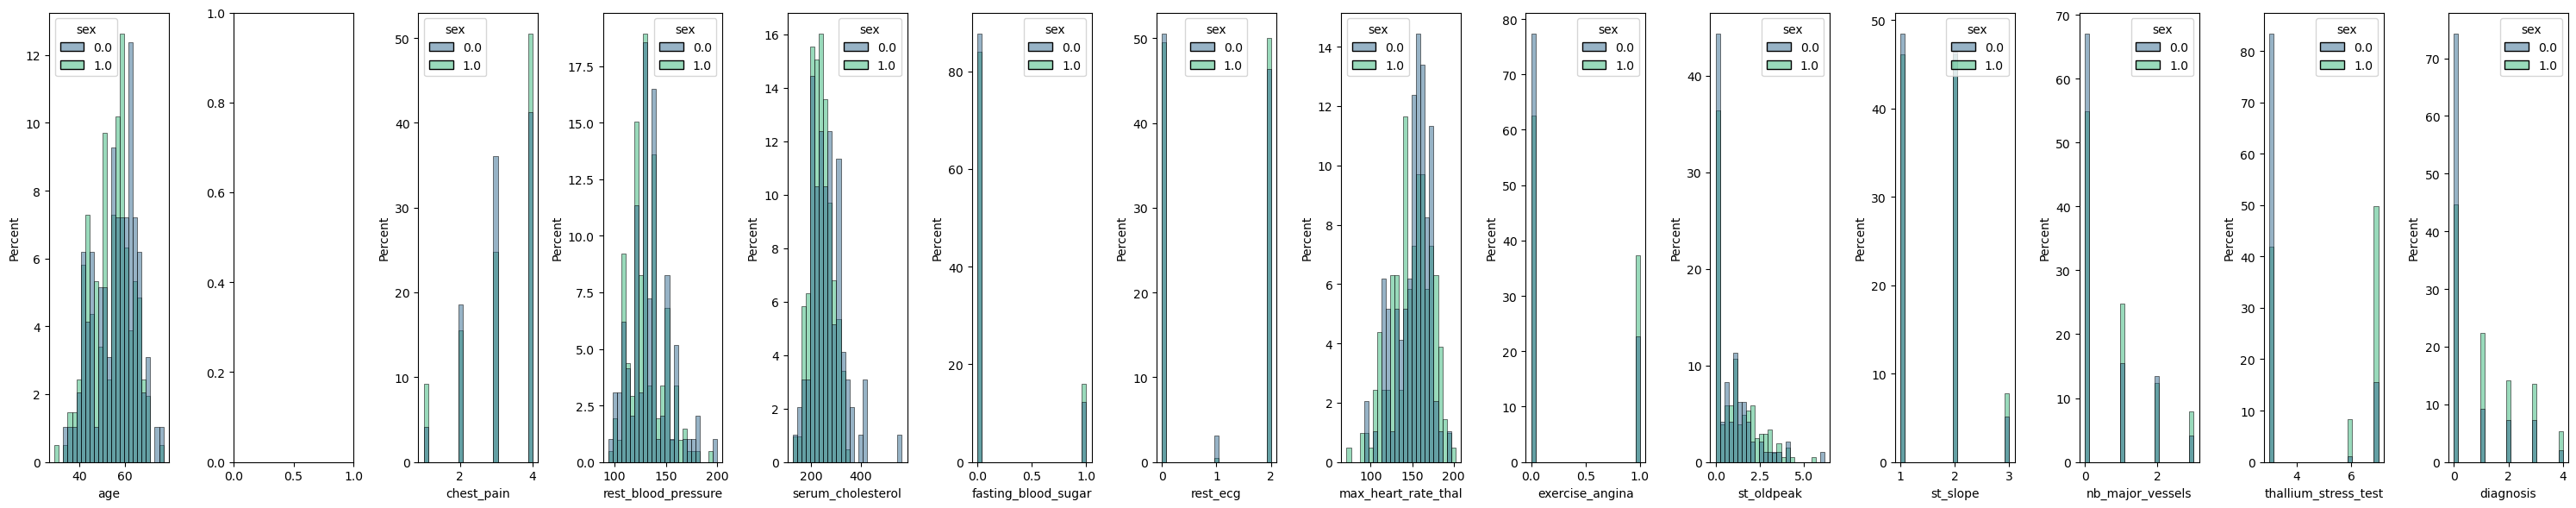

In [3]:
from src.plotting import hist_plot_numericals

hist_plot_numericals(df, hue_variable='sex')

In [9]:
num_df = df.select_dtypes(include='number')
print(num_df.shape)

(303, 14)


/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

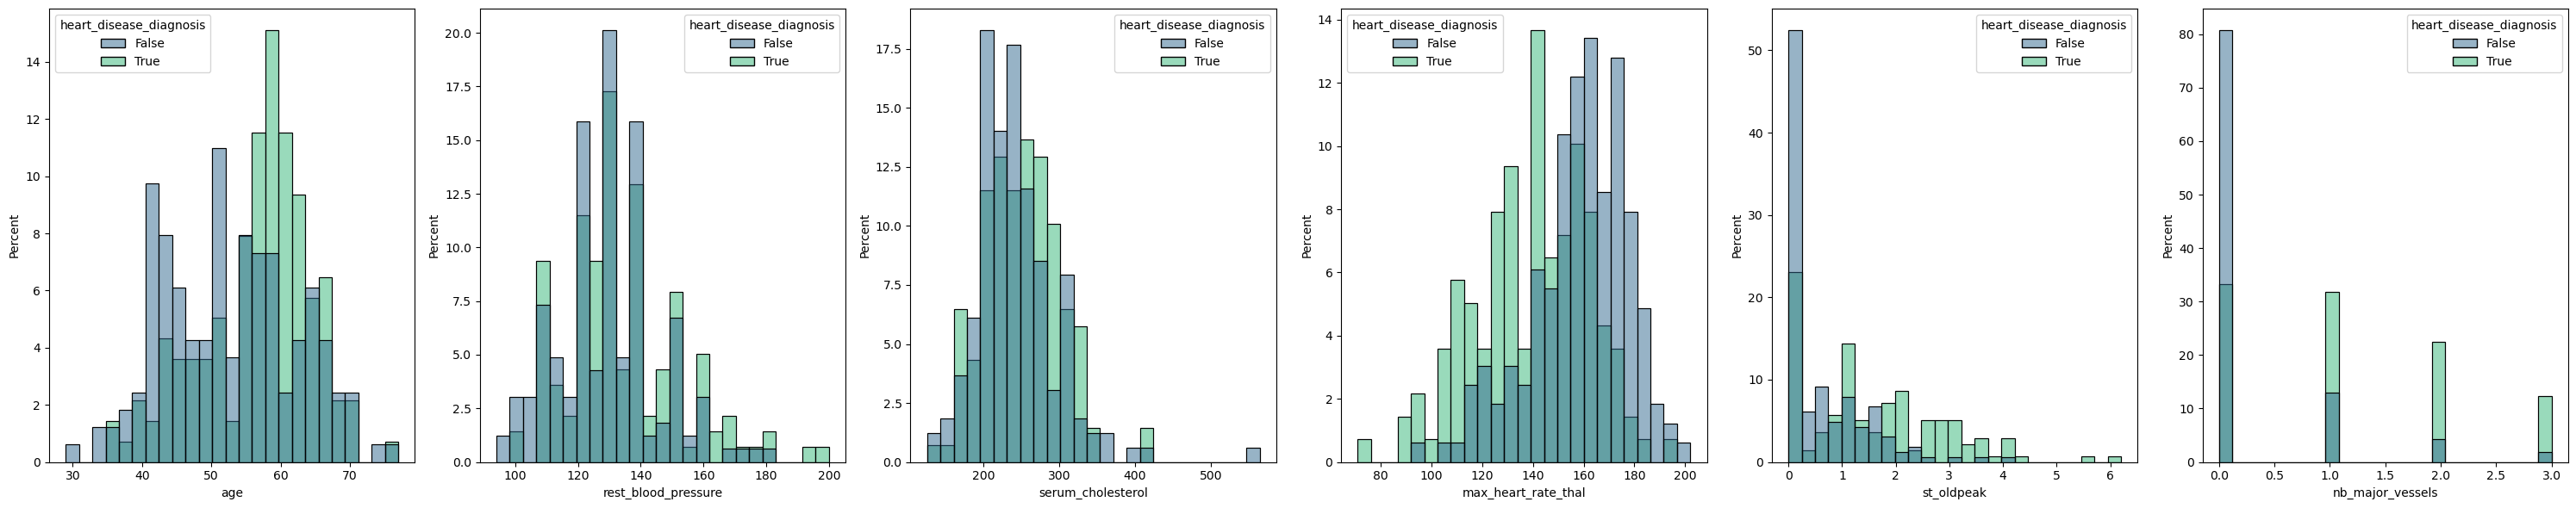

In [31]:
# Creating a figure for subplotting 
fig, axes = plt.subplots(ncols = 6, figsize=(30, 6))

# creating a loop to display histograms of numerical variables
for ax, column in zip(axes, df.drop(columns=categorical_columns+boolean_columns).columns):
    if "heart_disease_diagnosis" in column: continue
    sns.histplot(data = df, x = column, hue = "heart_disease_diagnosis", bins = 25, stat = "percent", common_norm = False, palette ="viridis", ax = ax)
    
plt.tight_layout()
plt.show()

Comment: For visual comparison purposes, the histograms were generated using a normalizing parameter (stat = "percent").  

### What's the distribution of each categorical variables in disease vs healthy group?

In [9]:
from src.plotting import plot_pie_chart

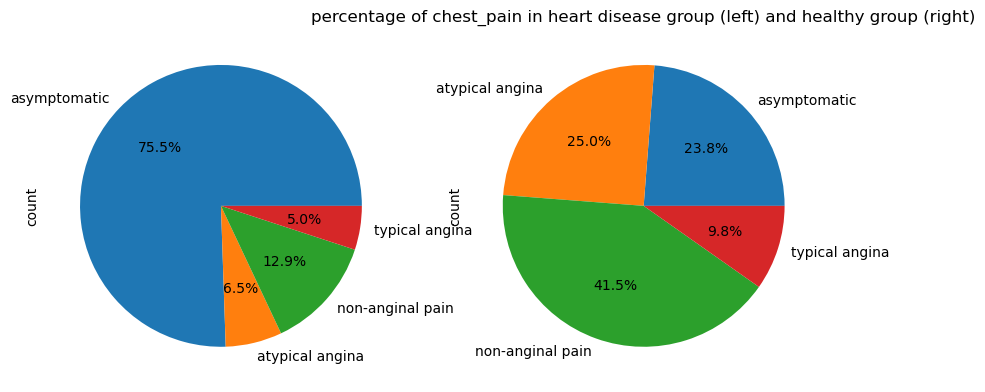

In [33]:
plot_pie_chart(df,'chest_pain')

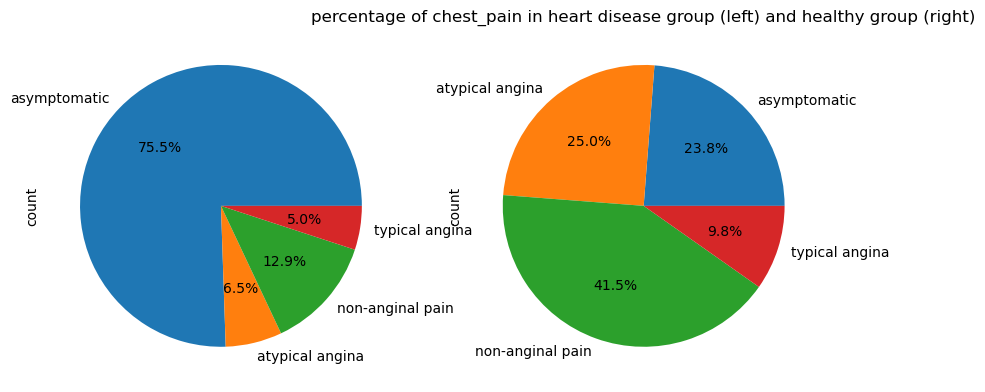

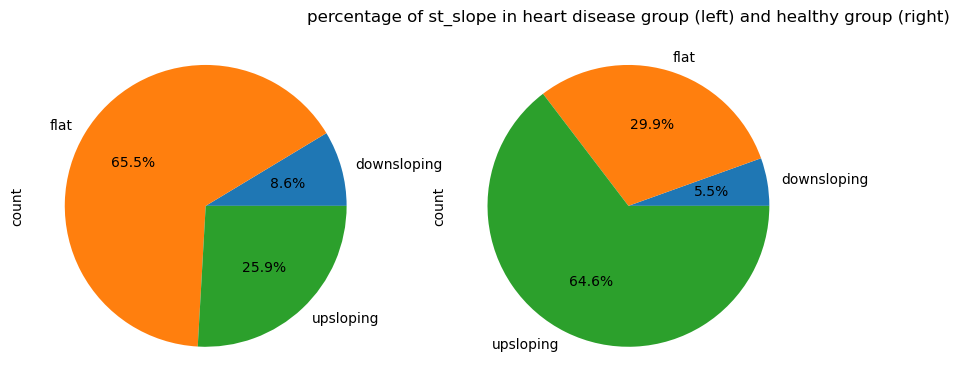

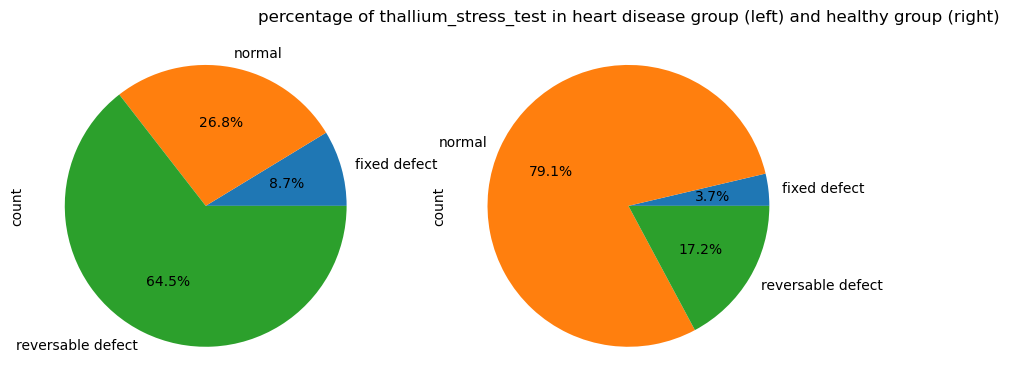

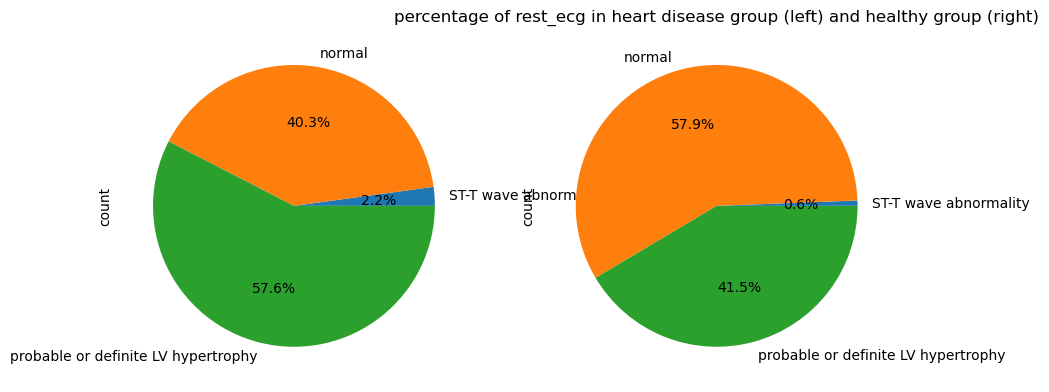

In [12]:
for column in categorical_columns:
    plot_pie_chart(df, column)

### Visualization of boolean variables

In [35]:
from src.plotting import contingency_table

heart_disease_diagnosis  False  True 
sex                                  
female                      72     25
male                        92    114


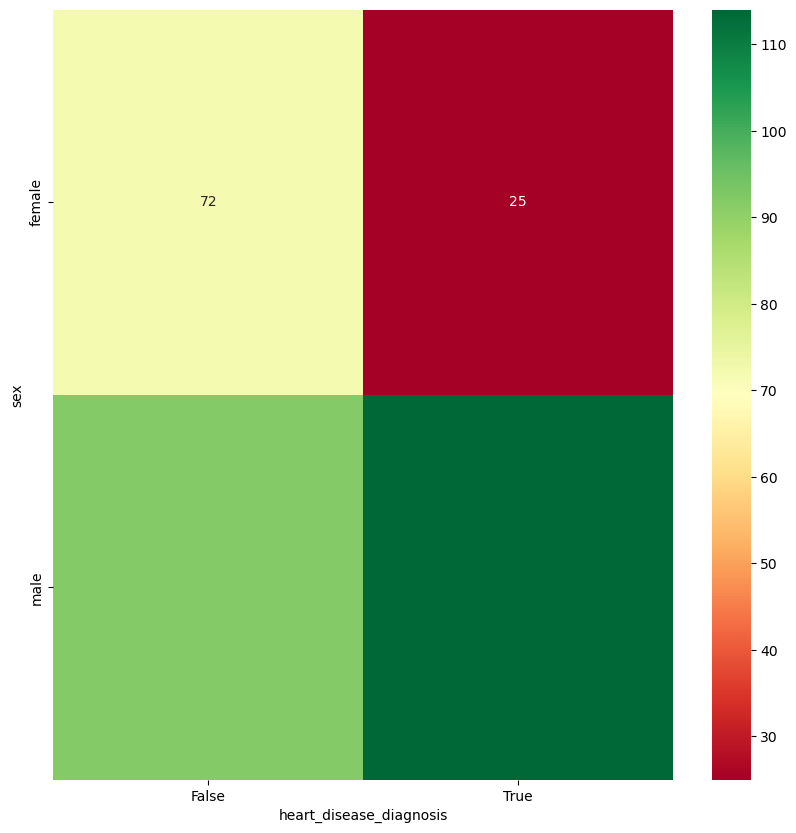

heart_disease_diagnosis   False  True 
high_fasting_blood_sugar              
False                       141    117
True                         23     22


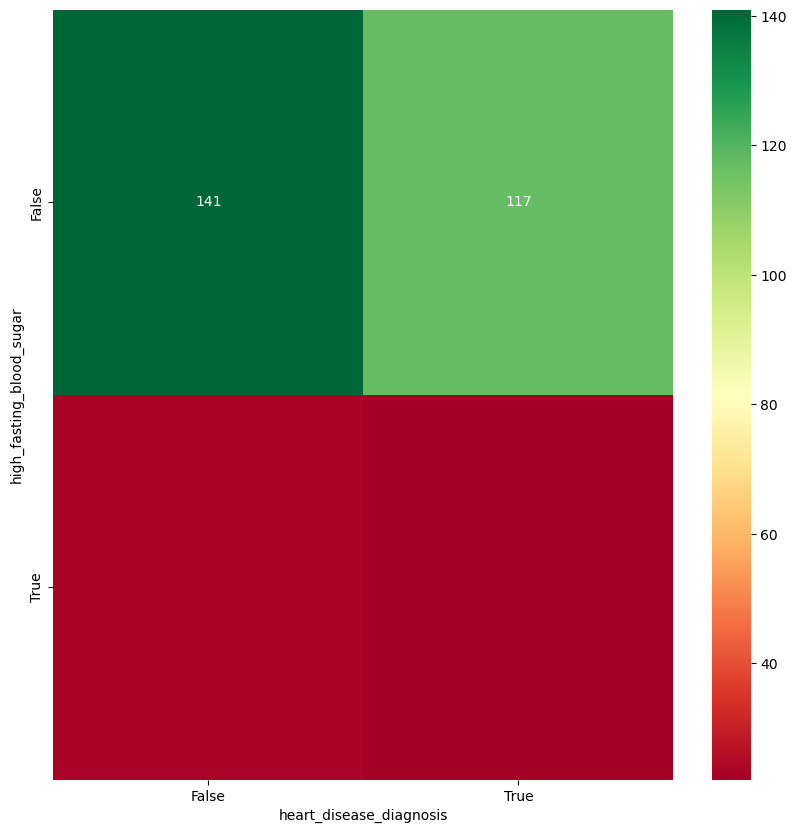

heart_disease_diagnosis  False  True 
exercise_angina                      
False                      141     63
True                        23     76


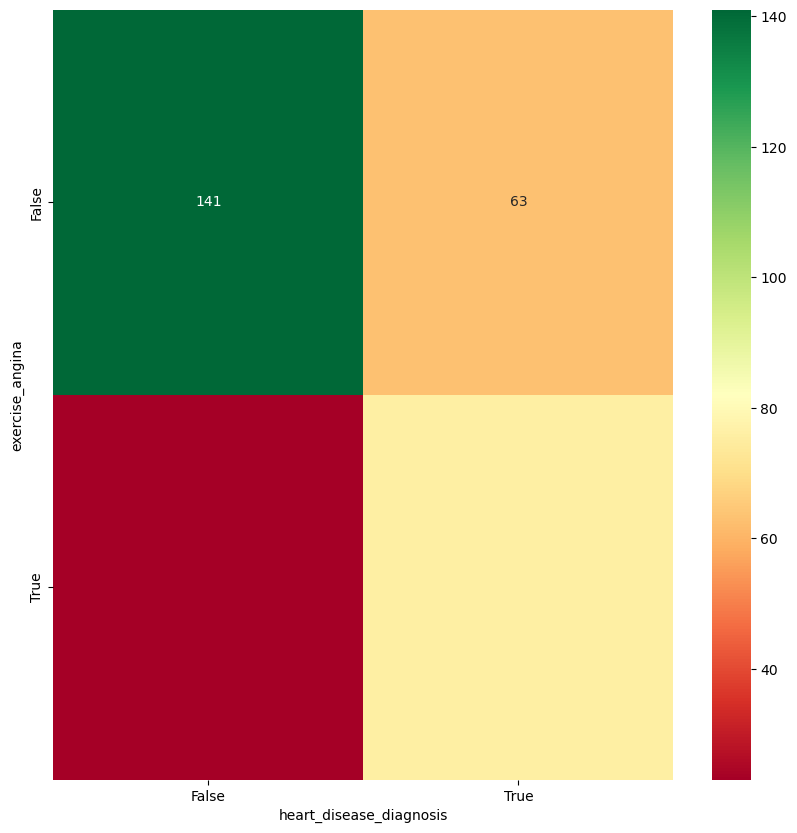

In [36]:
for column in boolean_columns:
    contingency_table(df, column)

### Looking for correlations

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

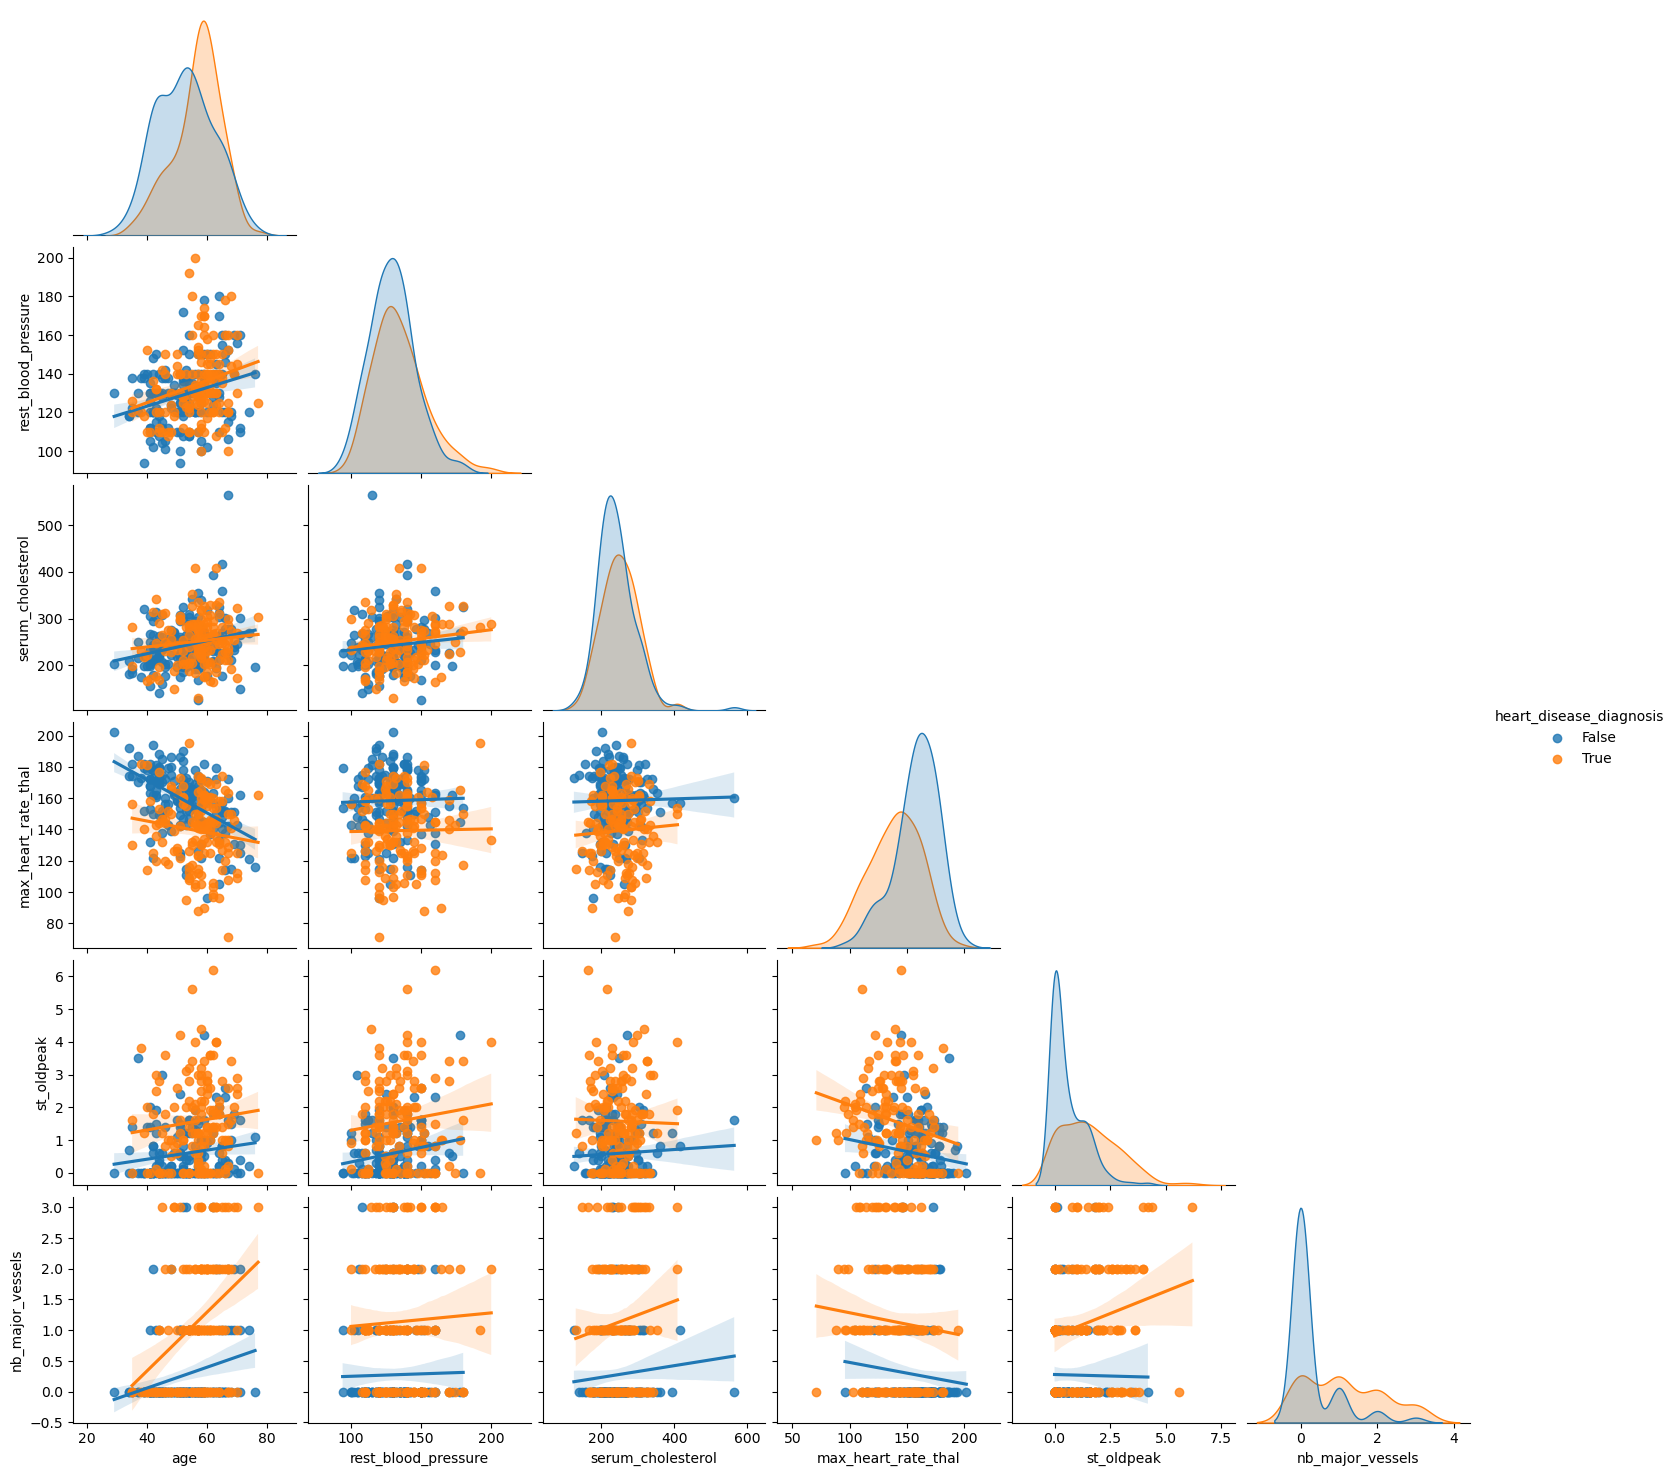

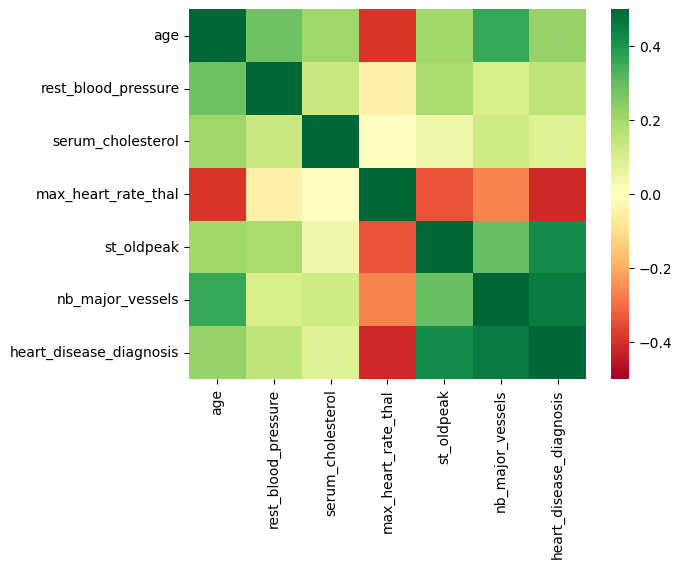

In [13]:
from src.plotting import look_for_correlations

look_for_correlations(df)

In [65]:
num_df.corr()

,age,rest_blood_pressure,serum_cholesterol,max_heart_rate_thal,st_oldpeak,nb_major_vessels,heart_disease_diagnosis
age,1.000000,0.284946,0.208950,-0.393806,0.203805,0.362605,0.223120
rest_blood_pressure,0.284946,1.000000,0.130120,-0.045351,0.189171,0.098773,0.150825
serum_cholesterol,0.208950,0.130120,1.000000,-0.003432,0.046564,0.119000,0.085164
max_heart_rate_thal,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.264246,-0.417167
st_oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000,0.295832,0.424510
nb_major_vessels,0.362605,0.098773,0.119000,-0.264246,0.295832,1.000000,0.460442
heart_disease_diagnosis,0.223120,0.150825,0.085164,-0.417167,0.424510,0.460442,1.000000


In [74]:
corr_matrix = num_df.corr()
corr_matrix['heart_disease_diagnosis'].sort_values(ascending = False)

heart_disease_diagnosis    1.000000
nb_major_vessels           0.460442
st_oldpeak                 0.424510
age                        0.223120
rest_blood_pressure        0.150825
serum_cholesterol          0.085164
max_heart_rate_thal       -0.417167
Name: heart_disease_diagnosis, dtype: float64

### Relationship between cholesterol and heart disease diagnosis

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


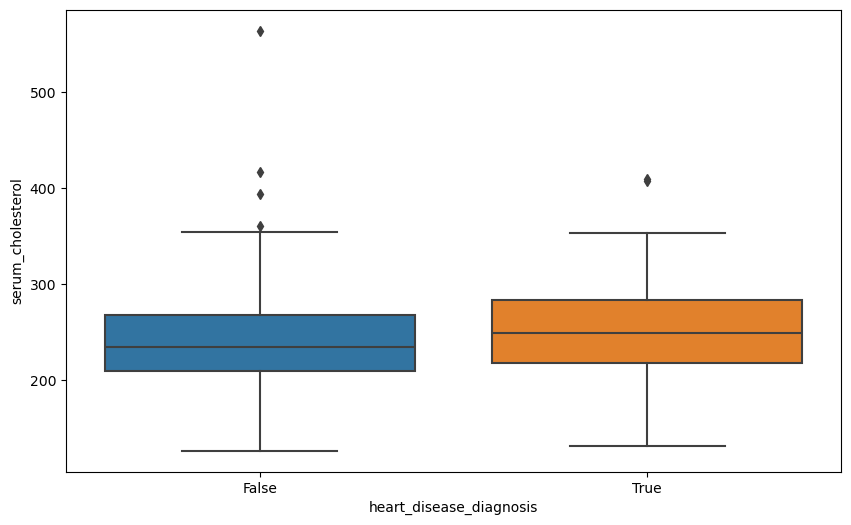

In [37]:
# Lete's check the relationship between cholesterol and heart disease diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='heart_disease_diagnosis', y='serum_cholesterol')
plt.show()

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='chest_pain', ylabel='count'>

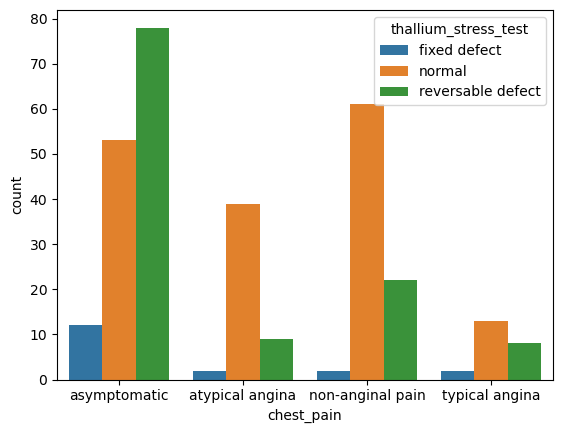

In [40]:
sns.countplot(data = df, x = 'chest_pain', hue = 'thallium_stress_test')

## Data cleaning

In [10]:
# Check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Comment: 4 values are missing in the column 'ca' and 2 values are missing in the column 'thal'.

'ca' is the number of major vessels (0-3) colored by fluoroscopy.

'thal' is the thallium scintigraphy result.


In [ ]:
# do I check for duplicates? 